<a href="https://colab.research.google.com/github/scarfboy/wetsuite-dev/blob/main/examples/dataset_kansspelautoriteit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip --quiet install https://github.com/scarfboy/wetsuite-dev/archive/refs/heads/main.zip
!python3 -m spacy download nl_core_news_md

In [ ]:
# we will use spacy to get just the nouns out
import spacy
dutch = spacy.load('nl_core_news_md')

In [2]:
import wetsuite.datasets

ks = wetsuite.datasets.load('kansspelautoriteit')
print( ks.description )

Downloaded    1.1MiB  [==================================================]


Decompressing... 6.9MiBThis is a plaintext form of the set of documents you can find under https://kansspelautoriteit.nl/aanpak-misstanden/sanctiebesluiten/ as PDFs.

        Since almost half of those PDFs do not have a text stream, this data is entirely OCR'd,
        so expect some typical OCR errors.  The OCR quality seems fairly decent, and some effort was made to remove headers and footers,
        yet there are some leftovers  like _ instead of . and = instead of :


        The data is a fairly nested structure of python objects (or JSON, before it's parsed).
            .data is a list of cases.

            each case is a dict, with a 'name', and constituent 'docs' (a list)

            each document is a dict, which a 'url' and constituent 'pages' (a list)

            each page is a dict, which current has just one key, 'body_text'

            the body_text's value is a list, which containts text fragments that are _almost_ like paragraphs 
            except that text may

  done.


# What does the data look like?

Text grouped into pages, mainly. 
A bit bulky, so we're giving a summary via wordclouds.

CASE: Toto Online B.V.
  01_278_071_15091_sanctiebesluit_toto_ov.pdf
  01_278_082_ov_openbaarmakingsbesluit_woo_15091.pdf
  2204 words


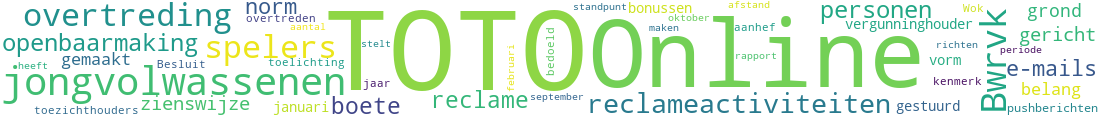


--------------------------------------------------------------------------------
CASE: Nationale Posctode Loterij N.V.
  sanctiebesluit_npl.pdf
  openbaarmakingsbesluit_npl.pdf
  2344 words


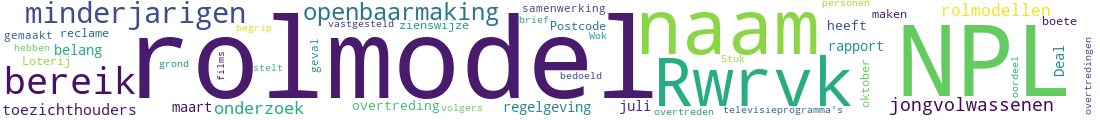


--------------------------------------------------------------------------------
CASE: M.K.C Limited
  20220823_01_265_505_-_besluit_last_onder_dwangsom_ov.pdf
  20220823_01_265_507_-_besluit_openbaarmaking_ov.pdf
  1589 words


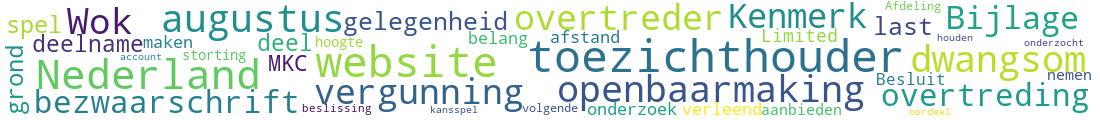


--------------------------------------------------------------------------------
CASE: L.C.S Limited
  20220817_01_265_500_-_besluit_lod_sons-of-slots_ov.pdf
  20220817_01_265_499_-_besluit_openbaarmaking_ov.pdf
  1590 words


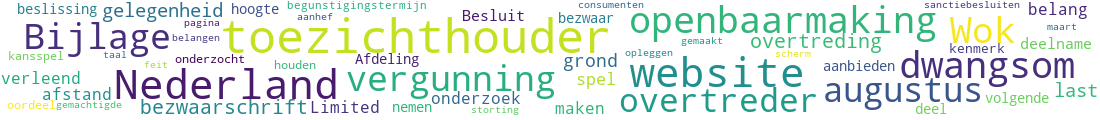


--------------------------------------------------------------------------------
CASE: Gammix Limited
  20220707_01_270_078_-_lod_gammix_ov.pdf
  20220707_01_270_081_-_besluit_openbaarmaking_gammix_ov.pdf
  2029 words


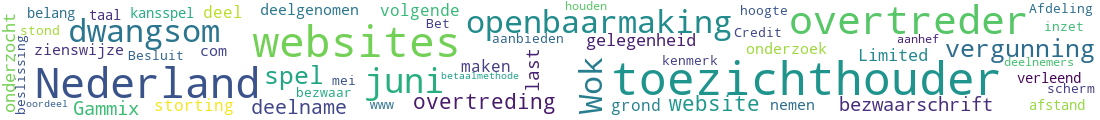


--------------------------------------------------------------------------------
CASE: Red Ridge Marketing
  20220412_01_263_969_besluit_lod_ov_1.pdf
  20220412_01_263_968_besluit_openbaarmaking_wob_ov_1.pdf
  1664 words

--------------------------------------------------------------------------------
CASE: Performing Media Limited
  last_onder_dwangsom_performing_media_limited.pdf
  besluit_tot_openbaarmaking_performing_media_limited.pdf
  1787 words

--------------------------------------------------------------------------------
CASE: Linkerik B.V.
  besluit_last_onder_dwangsom_14508.pdf
  besluit_openbaarmaking_14508.pdf
  1559 words

--------------------------------------------------------------------------------
CASE: Onlinecasinobonus.nl
  last_onder_dwangsom_onlinecasinobonus_nl.pdf
  besluit_openbaarmaking_onlinecasinobonus_nl.pdf
  2048 words

--------------------------------------------------------------------------------
CASE: LCB CORP
  lcb_corp_lod_20211213_01_252_632_lo

In [6]:
import textwrap, random, re
import wetsuite.helpers.string
import wetsuite.helpers.format
import wetsuite.extras.word_cloud

stop_mixed = []
stop_mixed.extend( wetsuite.extras.word_cloud.stopwords_nl)
stop_mixed.extend( 'Kansspelautoriteit kansspelen artikel lid Wet raad bestuur besluit'.split() )

def show_wordcloud(words):
    counts = wetsuite.extras.word_cloud.count_normalized( words, stopwords=stop_mixed )
    im = wetsuite.extras.word_cloud.wordcloud_from_freqs( counts, 1100, 120 )
    display( im )   # note: display() comes from IPython notebook code.  Outside of notebooks you would probably im.save() instead.


num_cases, num_docs, num_pages, num_pars, num_words = 0, 0, 0, 0, 0

cases = ks.data

num_demo_cases = 5  # only show wordcloud image for first few cases, to keep notebook size down (the rest are still parsed, just for word count)

for case_i, case in enumerate( cases ) : # show only the first few
    num_cases += 1
    print( 'CASE: %s'%case['name'] )
    words = []
    for doc in case['docs']:
        num_docs += 1
        print( '  %s'%wetsuite.helpers.format.url_basename(doc['url']) )
        for page in doc['pages']:
            num_pages += 1
            for par in page['body_text']:
                num_pars += 1
                #for line in textwrap.wrap( par ):
                #    print(line)
                #print()
                parsed = dutch(par)
                for token in parsed:
                    num_words += 1
                    if token.pos_ in ('NOUN','PROPN', 'VERB'):
                        words.append( token.text )

    print( '  %d words'%(len(words))  )
    if case_i < num_demo_cases: 
        show_wordcloud( words )
    print()
    print('-'*80)


print( '\n\nTotal number of   cases:%d  documents:%d   pages:%d   text fragments:%d   words:%d'%( num_cases, num_docs, num_pages, num_pars, num_words) )